In [60]:
import warnings
warnings.filterwarnings('ignore')

In [65]:
!pip install kaggle

!touch /Users/glebslivin/anaconda3/lib/python3.10/site-packages/kaggle/kaggle.json
#Here you need to take your own api key from kaggle
api_token = {"username": "bigggl", 
             "key": "5c87be36d6b756ca2dac4b1319348221",
             "path": "/Users/glebslivin/.kaggle/data"}


import json

with open("/Users/glebslivin/anaconda3/lib/python3.10/site-packages/kaggle/kaggle.json", "w") as file:
    json.dump(api_token, file)


mkdir: /Users/glebslivin/.kaggle/data: File exists


In [72]:
!mkdir ~/.kaggle
# !mkdir /Users/glebslivin/kadata
!touch ~/.kaggle/kaggle.json

#Here you need to take your own api key from kaggle
api_token = {"username": "bigggl", 
             "key": "5c87be36d6b756ca2dac4b1319348221"}

import json

with open("/Users/glebslivin/.kaggle/kaggle.json", "w") as file:
    json.dump(api_token, file)

mkdir: /Users/glebslivin/.kaggle: File exists


In [73]:
!chmod 600 /Users/glebslivin/.kaggle/kaggle.json

In [74]:
!kaggle competitions download -c competitive-data-science-predict-future-sales 

 99%|█████████████████████████████████████▋| 15.0M/15.1M [00:09<00:00, 1.75MB/s]
100%|██████████████████████████████████████| 15.1M/15.1M [00:09<00:00, 1.67MB/s]


# Написание класса LinearRegressinon

In [108]:
import numpy as np
def MSE(y_predict: np.array, y_true:np.array) ->float:
    N = y_predict.shape[0]
    answer = np.sum(pow(y_true - y_predict,2))/N
    return answer
np.random.seed(42)

class LinearRegression:
    def __init__(self, **kwargs):
        self.coef_ = None
#         self.error = MSE()
        pass

    def fit(self, x: np.array, y: np.array):
        # TODO: напишите метод .fit() класса LinearRegression
        x = np.hstack((x,np.array([1]*x.shape[0]).reshape(-1,1)))
        self.coef_ = np.dot(np.dot(np.linalg.matrix_power(np.dot(x.T,x),-1),x.T),y)
        pass

    def predict(self, x: np.array):
        # TODO: напишите метод .predict(x) класса LinearRegression
        x = np.hstack((x,np.array([1]*x.shape[0]).reshape(-1,1)))
        y = np.sum(self.coef_*x,axis = 1)
        return y
        pass

In [84]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

X, y = load_diabetes(return_X_y=True) #Этот датасет уже предобработан
print(X[:5])

[[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990749 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632753 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06833155 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567042 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286131 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665608  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02268774 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187239  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03198764 -0.04664087]]


In [81]:
# Разбиение датасета на тренировочную и тестовую часть
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

In [109]:
# Создание объекта Вашего класса и его обучение
LinReg = LinearRegression()
LinReg.fit(X_train, y_train)

In [111]:
# Прогноз на тестовом датасете
predictions = LinReg.predict(x_test)
predictions

array([138.46970031, 181.10052342, 125.34400904, 292.75977277,
       123.8830531 ,  91.89830434, 257.26463123, 177.76169318,
        84.98549706, 109.15960992,  94.4855284 , 166.13235108,
        57.40742502, 206.13897354,  97.7811842 , 131.00472765,
       214.29789972, 252.52907661, 199.66656381, 219.49985634,
       203.23671317,  88.00656925,  70.65108459, 186.92233427,
       155.81266751, 162.81022205, 191.93135706, 184.72924276,
        46.62920829, 108.26566599, 178.14743952,  91.35065005,
       127.72125745, 184.04205666, 172.23799897, 189.51548863,
       121.83265708, 117.75339206, 145.67950306,  58.57563401,
        72.55421321, 107.27571105, 166.15280313, 153.29339984,
       165.19282154,  62.95752038,  73.58909449, 110.05656189,
        54.49723354, 164.88920632, 152.49472803,  63.8874565 ,
       111.4354561 , 108.34936269, 179.96973311, 158.70054112,
        95.04833555, 209.68990406, 118.37356519,  69.69946093,
       189.04680627, 204.99138626, 140.26840176, 105.75

# Функция для вычисления $R^2$

In [113]:
def MSE(y_predict: np.array, y_true:np.array) ->float:
    N = y_predict.shape[0]
    answer = np.sum(pow(y_true - y_predict,2))/N
    return answer
def R_2(y_true: np.array,y_predict: np.array) -> float:
    answer = 1 - MSE(y_predict,y_true)/(np.sum(pow(y_true - np.mean(y_true),2)))

In [121]:
import numpy as np
def MSE(y_pred: np.array, y_true:np.array) ->float:
    N = y_pred.shape[0]
    answer = np.sum(pow(y_true - y_pred,2))/N
    return answer
def r2(y_true: np.array,y_pred: np.array) -> float:
    N = y_pred.shape[0]
    answer = 1 - MSE(y_pred,y_true)*N/(np.sum(pow(y_true - np.mean(y_true),2)))
    return answer

In [137]:
# r2(predictions,y_test)
x

array([[1],
       [2],
       [3],
       [4]])

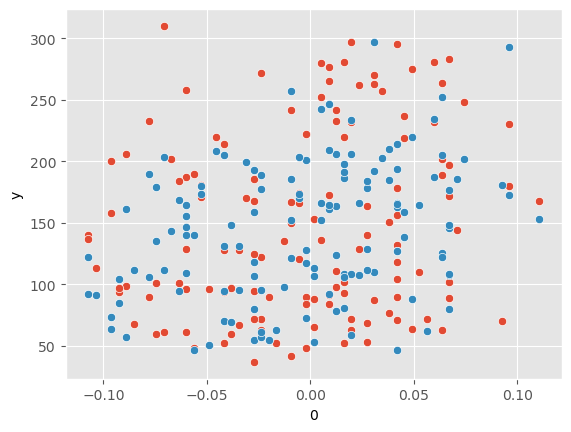

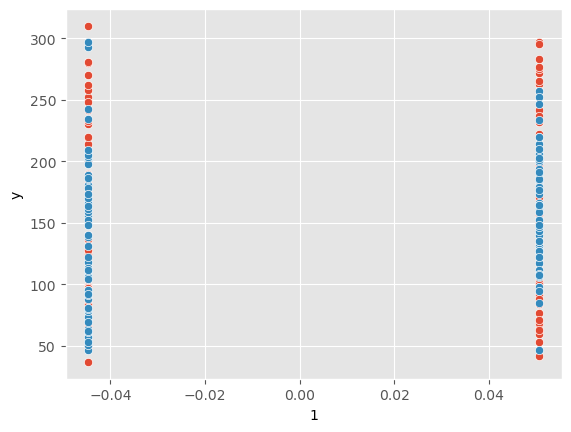

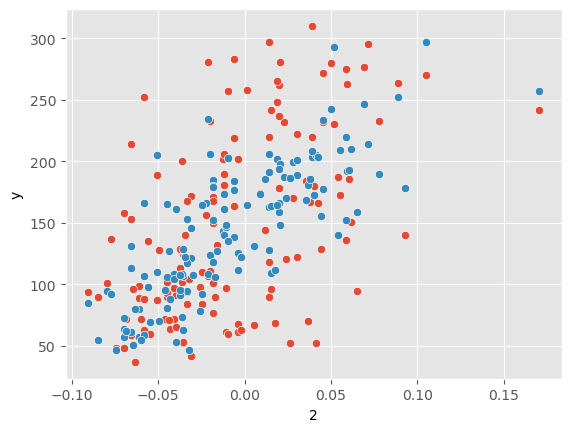

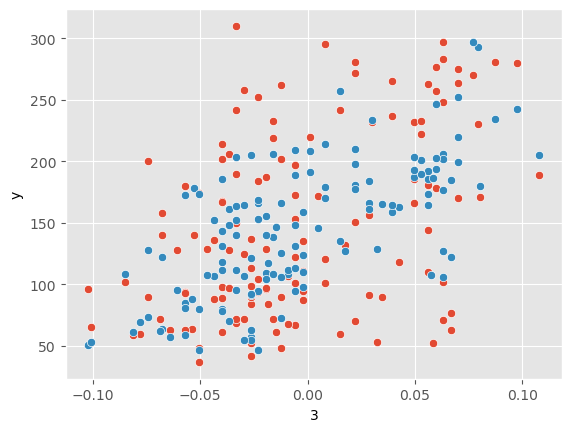

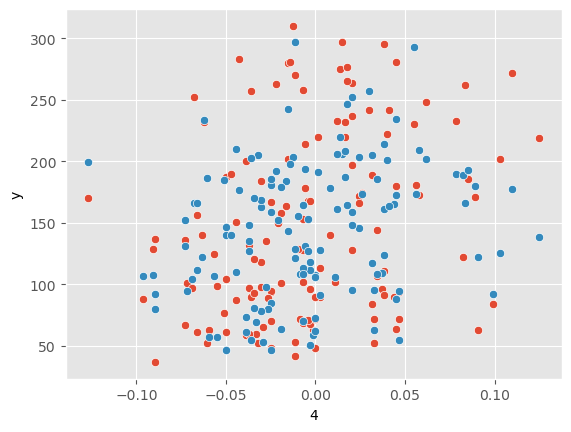

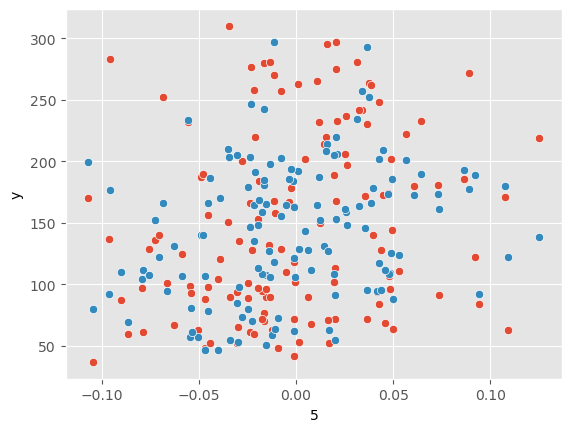

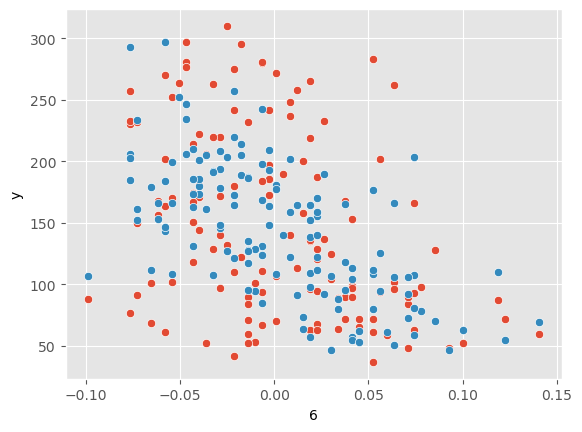

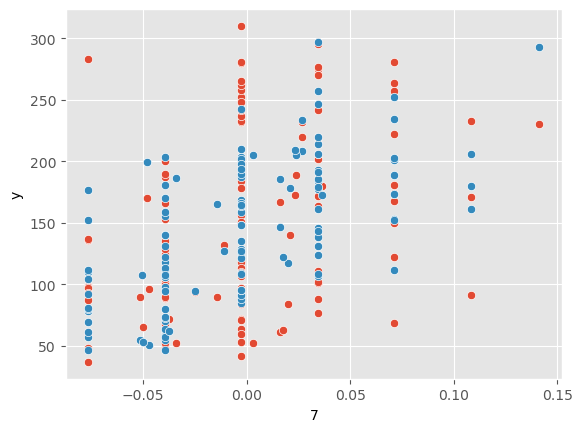

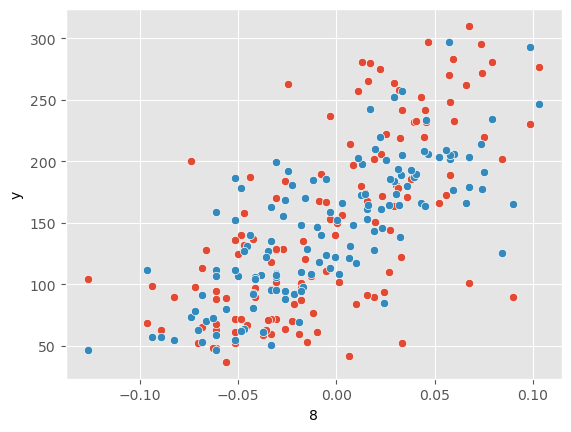

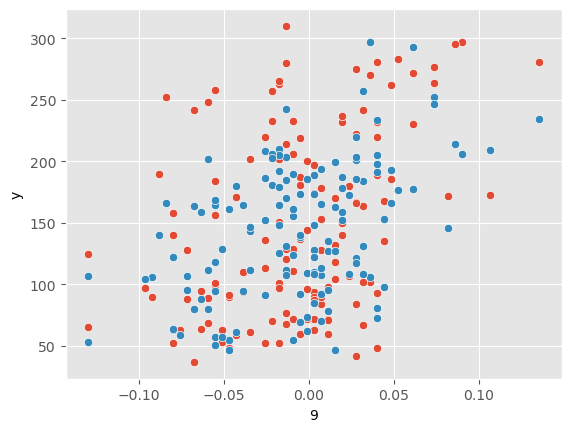

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
for column in range(x_test.shape[1]):
    sns.scatterplot(x = x_test[:,column], y = y_test)
    sns.scatterplot(x = x_test[:,column], y = predictions)
    plt.xlabel(column)
    plt.ylabel('y')
    plt.show()

# Поиск наилучшей и худшей выборки с точки зрения $R^2$

In [163]:
R2 = []
for filename in [1,2,3,4,5]:
    x = np.load(str(filename)+'.npy')
    x_train,x_test,y_train,y_test = train_test_split(
        x[:,:x.shape[1]-1],x[:,-1],
        test_size= 0.3,
        random_state= 42)
# Разбиваем выборку на тренировочную и тестовую 
    model = LinearRegression()
    model.fit(x_train,y_train)
    R2.append(r2(model.predict(x_test),y_test))
R2 = np.array(R2)
print(R2)
print('Наилучшая:',np.argmax(R2)+1,' ',np.max(R2))
print('Худшая:',np.argmin(R2)+1,' ',np.min(R2))

[ 0.7519472   0.69526624  0.92946864 -1.84084759  0.82537372]
Наилучшая: 3   0.9294686432653145
Худшая: 4   -1.8408475861145468


array([-10.34423652,   1.46598228,  -6.40749692,  -0.50238752,
         8.35527657,   7.37109168, -11.32842142,  -7.39168182,
         4.41853698])